# Poisson

$$f\left(\left.y\right|x_{i}\right)=\frac{\exp\left(-\mu\left(x_{i}\right)\right)\mu\left(x_{i}\right)^{y}}{y!}$$

$$\mu\left(X_{i}\right)=\exp\left(X_{i}\theta\right)$$

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)
sns.set_context('notebook')

%matplotlib inline

## Generate data

In [2]:
# True parameter
theta = .5
# Sample size
n = int(1e2)
# Independent variable, N(0,1)
X = np.random.normal(0, 1, n)
# Sort data for nice plots
X = np.sort(X)

mu = np.exp(X * theta)
# Error term, N(0,1)
Y = np.random.poisson(mu, n)

## Plot the data and the model

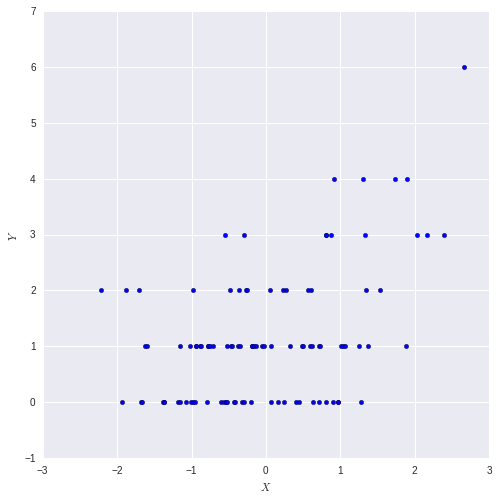

In [3]:
plt.figure(figsize = (8, 8))

plt.scatter(X, Y, label='Observed data')
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

plt.show()

## Maximize log-likelihood

$$l\left(y|x,\theta\right)=\sum_{i=1}^{n}\log\frac{\exp\left(-\mu\left(x_{i}\right)\right)\mu\left(x_{i}\right)^{y_{i}}}{y_{i}!}$$

In [4]:
import scipy.optimize as opt
from scipy.stats import poisson

# Define objective function
def f(theta, X, Y):
    Q = - np.sum(np.log(1e-3 + poisson.pmf(Y, np.exp(X * theta))))
    return Q

# Run optimization routine
theta_hat = opt.fmin_bfgs(f, 0., args=(X, Y))

print(theta_hat)

Optimization terminated successfully.
         Current function value: 130.738440
         Iterations: 5
         Function evaluations: 21
         Gradient evaluations: 7
[ 0.4621]


## Plot objective function, true parameter, and the estimate

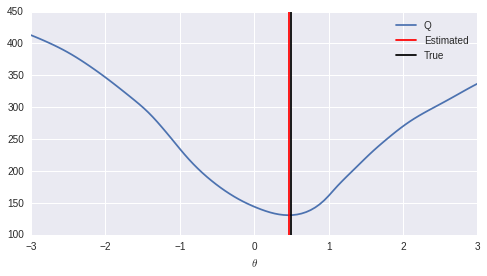

In [5]:
# Generate data for objective function plot
th = np.linspace(-3., 3., 1e2)
Q = [f(z, X, Y) for z in th]

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(th, Q, label='Q')
plt.xlabel(r'$\theta$')
plt.axvline(x=theta_hat, c='red', label='Estimated')
plt.axvline(x=theta, c='black', label='True')
plt.legend()
plt.show()

## Solve first order conditions

In [6]:
from scipy.optimize import fsolve

# Define the first order condition
def df(theta, X, Y):
    return - np.sum(X * (Y - np.exp(X * theta)))

# Solve FOC
theta_hat = fsolve(df, 0., args=(X, Y))

print(theta_hat)

[ 0.4619]


## Plot first order condition

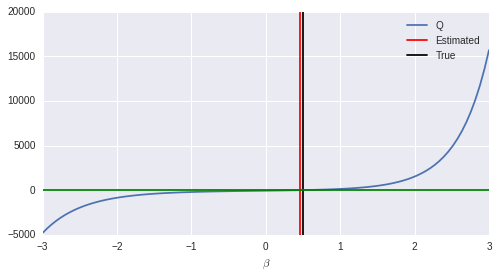

In [7]:
# Generate data for the plot
th = np.linspace(-3., 3., 1e2)
Q = np.array([df(z, X, Y) for z in th])

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(th, Q, label='Q')
plt.xlabel(r'$\beta$')
plt.axvline(x=theta_hat, c='red', label='Estimated')
plt.axvline(x=theta, c='black', label='True')
plt.axhline(y=0, c='green')
plt.legend()
plt.show()

## Plot original data and fitted mean

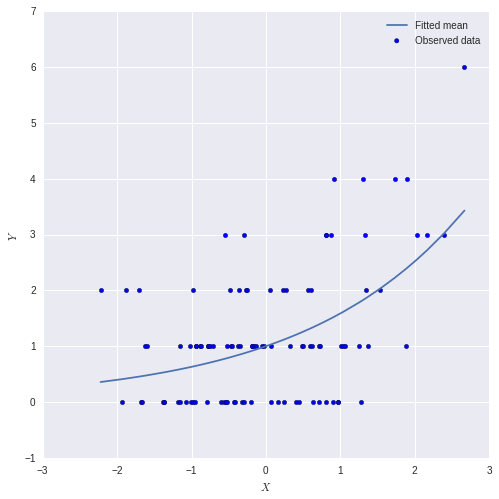

In [8]:
plt.figure(figsize=(8, 8))

plt.scatter(X, Y, label='Observed data')
plt.plot(X, np.exp(X * theta_hat), label='Fitted mean')
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')
plt.legend()

plt.show()